# Exercise 6.5

## Table of Contents:

1. Importing Data and Libraries
2. The Elbow Technique
3. K-Means Clustering

## Importing Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
#importing data using path shortcut

path1 = r'/Users/elysegross/Documents/Data Analytics/A6/'
df_emissions = pd.read_csv(os.path.join(path1, 'Data', '2019 Emissions Clean and Wrangled.csv'))


## Data Preprocessing

In [10]:
df_emissions.dtypes

Unnamed: 0                                                 int64
Unnamed: 0.1                                               int64
Plant Code                                                 int64
Plant Name                                                object
State                                                     object
Sector Group                                              object
Sector Code                                              float64
Prime Mover                                               object
Fuel Code                                                 object
Aggregated Fuel Group                                     object
Generation (kWh)                                         float64
Useful Thermal Output (MMBtu)                            float64
Total Fuel Consumption (MMBtu)                           float64
Fuel Consumption for Electric Generation (MMBtu)         float64
\n Fuel Consumption for Useful Thermal Output (MMBtu)    float64
Quantity of Fuel Consumed

In [16]:
# Using only numerical columns

df_emissions_num = df_emissions[['Generation (kWh)', 'Useful Thermal Output (MMBtu)', 'Total Fuel Consumption (MMBtu)', 'Fuel Consumption for Electric Generation (MMBtu)','\n Fuel Consumption for Useful Thermal Output (MMBtu)', 'Quantity of Fuel Consumed', 'Tons of CO2 Emissions', 'Metric Tonnes of CO2 Emissions']]
                                 

## The Elbow Technique

This is a method to figure out how many clusters to use in my k-means agorithm below.


In [18]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [20]:
# Find a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_emissions_num).score(df_emissions_num) for i in range(len(kmeans))] # Creates a score that represents 

score

[-9.713410991520022e+21,
 -3.33964686651395e+21,
 -1.4192612040902086e+21,
 -8.125587396140973e+20,
 -5.2169301768310804e+20,
 -3.3655098676340366e+20,
 -2.5509038345024943e+20,
 -1.9828739604146307e+20,
 -1.5991800345386366e+20]

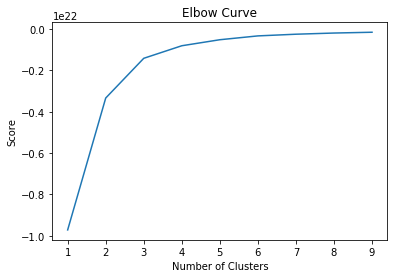

In [21]:
# Plotting the elbow curve created above using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the chart above, we see large jump from two to three on the x-axis, another smaller jump from three to four and then the curve straightens out. So, the optimal cluster amount is four.

## K-Means Clustering

In [37]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [38]:
# Fitting the k-means to our data.

kmeans.fit(df_emissions_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
# Creating the clusters using k-means.

df_emissions_num['clusters'] = kmeans.fit_predict(df_emissions_num)


/Users/elysegross/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# Ensuring the above clustering worked.

df_emissions_num.head()

,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Consumption (MMBtu),Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,clusters
0,2.824887e+09,0.0,1499638.0,1499638.0,0.0,1475594.0,87728.21,79586.51,2
1,5.306391e+09,0.0,55606180.0,55606180.0,0.0,54733332.0,3252938.83,2951046.74,1
2,4.174904e+09,0.0,41521966.0,41521966.0,0.0,2045976.0,4270348.31,3874034.57,1
3,1.646248e+08,0.0,1662458.0,1662458.0,0.0,1615087.0,97253.11,88227.45,0
4,1.699770e+08,108331.0,2309980.0,1981699.0,328281.0,2268569.0,135132.89,122591.75,0


In [41]:
# Counting values in each cluster.

df_emissions_num['clusters'].value_counts()

0    4333
2     553
1     139
3      49
Name: clusters, dtype: int64

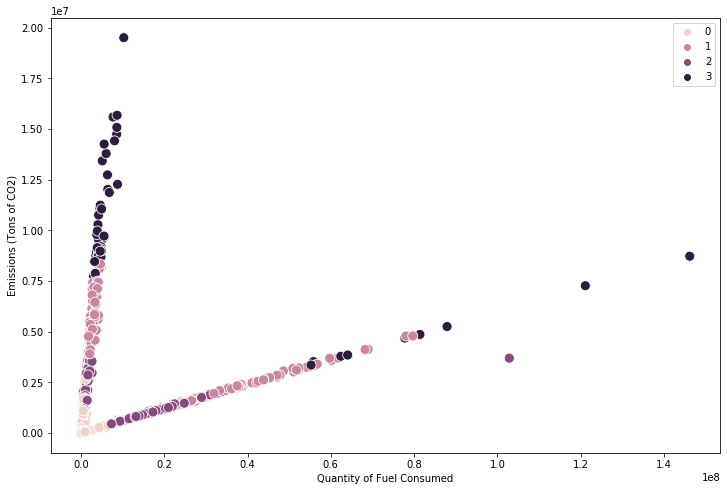

In [42]:
# Plotting the clusters for the "Quantity of Fuel Consumed" and "Tons of CO2 Emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_emissions_num['Quantity of Fuel Consumed'], y=df_emissions_num['Tons of CO2 Emissions'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Quantity of Fuel Consumed') 
plt.ylabel('Emissions (Tons of CO2)') 
plt.show()

In this scatterplot with clusters, we see low fuel consumption and low emissions are togehter and high emissions and high fuel consumption are together. However, it is odd that the clusters overlap a bit, which makes me wonder why that is. There seem to be more in the purple and pink clusters but the overlapping nature makes it hard to tell. If this is accurate, it means medium to low emitters and generators are more common than very high and very low ones.

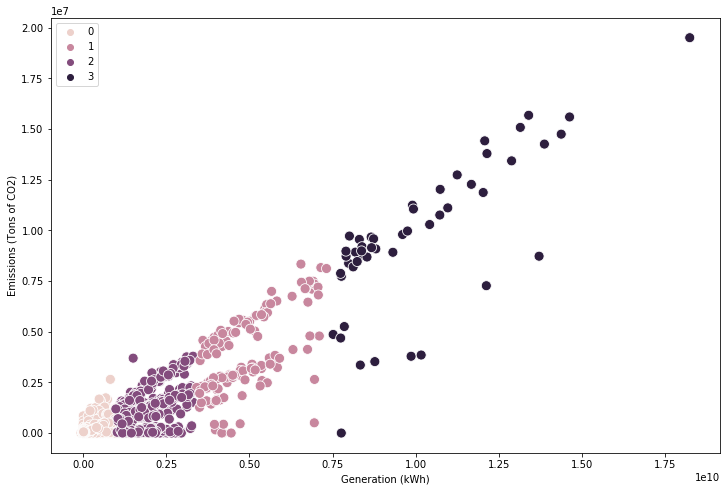

In [43]:
# Plotting the clusters for the "Generation (kWh)" and "Tons of CO2 Emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_emissions_num['Generation (kWh)'], y=df_emissions_num['Tons of CO2 Emissions'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Generation (kWh)') 
plt.ylabel('Emissions (Tons of CO2)') 
plt.show()

These clusters make sense because low emissions and low generation are togehter and high emissions and high generation are together. It is interesting to see that there are many of the purple points while there are less of dark purple and light pink. This means medium to low emitters and generators are more common than very high and very low ones.

In [51]:
# Creating a new column with colors instead of numbers 
    #to use with descriptive statistics.

df_emissions_num.loc[df_emissions_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_emissions_num.loc[df_emissions_num['clusters'] == 2, 'cluster'] = 'purple'
df_emissions_num.loc[df_emissions_num['clusters'] == 1, 'cluster'] = 'pink'
df_emissions_num.loc[df_emissions_num['clusters'] == 0, 'cluster'] = 'light pink'

/Users/elysegross/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
# Checking individual statistics.

df_emissions_num.groupby('cluster').agg({'Generation (kWh)':['mean', 'median'], 
                         'Tons of CO2 Emissions':['mean', 'median'], 
                         'Quantity of Fuel Consumed':['mean', 'median'],
                          'Useful Thermal Output (MMBtu)':['mean', 'median']})

Generation (kWh)               Tons of CO2 Emissions              \
                        mean        median                  mean      median   
cluster                                                                        
dark purple     1.007130e+10  9.312379e+09          9.661218e+06  9191775.76   
light pink      8.538297e+07  5.166269e+06          6.512843e+04     3645.75   
pink            4.850353e+09  4.543849e+09          3.880597e+06  3574715.28   
purple          1.868005e+09  1.746286e+09          1.073121e+06  1022986.05   

            Quantity of Fuel Consumed              \
                                 mean      median   
cluster                                             
dark purple              1.962533e+07   5062869.0   
light pink               6.834489e+05     21572.0   
pink                     2.350728e+07   8410445.0   
purple                   1.134072e+07  10058720.0   

            Useful Thermal Output (MMBtu)         
                                     mean median  
cluster                                           
dark purple                  47723.632653    0.0  
light pink                  158357.832910    0.0  
pink                        558206.395683    0.0  
purple                      430705.593128    0.0

These results could be useful for future steps of analysis to understand which clusters have higher average means and which are lower. It could help me analyze how emissions, generation, comsumption, and thermal output are related.

# THE END!